In [ ]:
import os
import shutil
import importlib.util
from gfootball.env import create_environment

def create_environment_with_custom_environment(custom_scenario_path, **kwargs):
    """
    指定されたカスタムシナリオを GFootball ライブラリ内に一時的にコピーし、
    create_environment を呼び出して環境を作成後、シナリオを削除する。
    
    Parameters:
        custom_scenario_path (str): カスタムシナリオファイルのフルパス
        **kwargs: create_environment に渡す他の引数

    Returns:
        gym.Env: 作成された環境
    """
    if not os.path.isfile(custom_scenario_path):
        raise FileNotFoundError(f"指定されたファイルが存在しません: {custom_scenario_path}")
    
    # GFootballのscenariosディレクトリを特定
    gfootball_spec = importlib.util.find_spec("gfootball")
    if gfootball_spec is None or gfootball_spec.submodule_search_locations is None:
        raise ImportError("gfootball ライブラリが見つかりませんでした。")

    gfootball_path = gfootball_spec.submodule_search_locations[0]
    scenarios_dir = os.path.join(gfootball_path, "scenarios")
    if not os.path.isdir(scenarios_dir):
        raise FileNotFoundError(f"GFootballのscenariosディレクトリが見つかりません: {scenarios_dir}")

    # カスタムファイル名
    scenario_filename = os.path.basename(custom_scenario_path)
    temp_scenario_path = os.path.join(scenarios_dir, scenario_filename)

    try:
        # シナリオをコピー
        shutil.copyfile(custom_scenario_path, temp_scenario_path)
        env_name = os.path.splitext(scenario_filename)[0]
        # 環境を作成
        env = create_environment(env_name=env_name, **kwargs)
        return env

    finally:
        # シナリオを削除
        if os.path.isfile(temp_scenario_path):
            os.remove(temp_scenario_path)


# Usage
p_scenario = './scenarios/custom_scenario.py'
env_dict = dict(
    representation="simple115",
    render=False
)
env = create_environment_with_custom_environment(p_scenario, **env_dict)

In [ ]:
import matplotlib.pyplot as plt

# プレイヤーロール名マッピング（簡易版）
ROLE_NAMES = {
    0: "GK", 1: "CB", 2: "LB", 3: "RB",
    4: "LWB", 5: "RWB", 6: "DM", 7: "CM", 8: "LM",
    9: "RM", 10: "AM", 11: "CF", 12: "ST"
}

def visualize_formation(players_team1, players_team2, title="Team Formation"):
    """
    2チームのプレイヤー配置をサッカーコート上に可視化します。
    
    Parameters:
        players_team1 (list): [(x, y, role)] のタプルのリスト
        players_team2 (list): [(x, y, role)] のタプルのリスト
        title (str): グラフのタイトル
    """
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # サッカーコートの描画
    ax.set_facecolor("green")
    ax.plot([-1, 1], [-0.68, -0.68], color='white')  # 下ライン
    ax.plot([-1, 1], [0.68, 0.68], color='white')    # 上ライン
    ax.plot([-1, -1], [-0.68, 0.68], color='white')  # 左
    ax.plot([1, 1], [-0.68, 0.68], color='white')    # 右
    ax.plot([0, 0], [-0.68, 0.68], color='white', linestyle='--')  # 中央線
    ax.add_patch(plt.Circle((0, 0), 0.09, color='white', fill=False))  # センターサークル

    # チーム1（青）
    for x, y, role in players_team1:
        ax.plot(x, y, 'bo')
        ax.text(x + 0.015, y + 0.015, ROLE_NAMES.get(role, str(role)), color='white', fontsize=8)

    # チーム2（赤）
    for x, y, role in players_team2:
        ax.plot(x, y, 'ro')
        ax.text(x + 0.015, y + 0.015, ROLE_NAMES.get(role, str(role)), color='white', fontsize=8)

    ax.set_xlim(-1.05, 1.05)
    ax.set_ylim(-0.75, 0.75)
    ax.set_title(title, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.grid(False)
    plt.show()


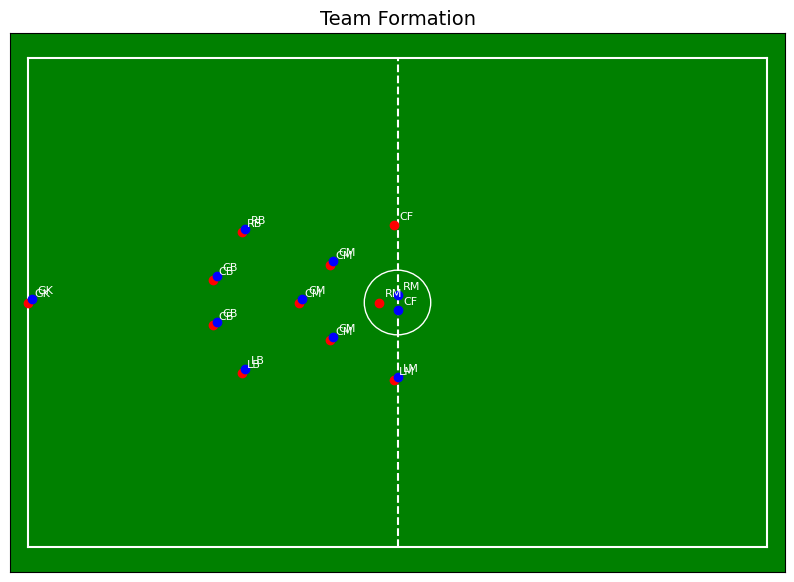

In [4]:
# 例: 上記コードから得たデータ
team1 = [
    (-1.000000, 0.000000, 0),  # GK
    (0.000000,  0.020000, 9),
    (0.000000, -0.020000, 11),
    (-0.422000, -0.19576, 2),
    (-0.500000, -0.06356, 1),
    (-0.500000, 0.063559, 1),
    (-0.422000, 0.195760, 3),
    (-0.184212, -0.10568, 7),
    (-0.267574, 0.000000, 7),
    (-0.184212, 0.105680, 7),
    (-0.010000, -0.21610, 8),
]

team2 = [
    (-1.000000, 0.000000, 0),  # GK
    (-0.050000, 0.000000, 9),
    (-0.010000, 0.216102, 11),
    (-0.422000, -0.19576, 2),
    (-0.500000, -0.06356, 1),
    (-0.500000, 0.063559, 1),
    (-0.422000, 0.195760, 3),
    (-0.184212, -0.10568, 7),
    (-0.267574, 0.000000, 7),
    (-0.184212, 0.105680, 7),
    (-0.010000, -0.21610, 8),
]

visualize_formation(team1, team2)
